##Descrição do Problema: Estamos lidando com um conjunto de dados de vendas de jogos, que incluem informações regionais, como a América e o "resto do mundo", além de dados relacionados a editoras, plataformas e títulos individuais. O objetivo principal é entender o comportamento de vendas de jogos ao longo do tempo, identificar padrões de crescimento, queda e analisar diferenças regionais e entre plataformas. Analise feita a esse conjunto de dados, permitirá responder a uma série de perguntas relacionadas ao comportamento das vendas de jogos em diferentes regiões, plataformas e editoras.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Leitura do dataset

dados = pd.read_csv('/Users/geraldocangondo/Desktop/Data_Analise/Proj_Analise_VendaGames/vgsales.csv')
dados.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
dados.shape

(16598, 11)

In [4]:
dados.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
dados.duplicated().sum()

0

In [7]:
dados.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [8]:
dados.notna().sum()

Rank            16598
Name            16598
Platform        16598
Year            16327
Genre           16598
Publisher       16540
NA_Sales        16598
EU_Sales        16598
JP_Sales        16598
Other_Sales     16598
Global_Sales    16598
dtype: int64

In [9]:
#1) Como é que o histórico de Vendas na America do Norte?

#agrupando os dados por ano e somando as vendas

hist_vendas = dados[['Year', 'NA_Sales', 
                     'EU_Sales', 'JP_Sales', 'Other_Sales', 
                     'Global_Sales']].groupby('Year').agg(lambda x: sum(x)).reset_index() 

hist_vendas.tail() 

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
34,2014.0,131.97,125.65,39.46,40.02,337.05
35,2015.0,102.82,97.71,33.72,30.01,264.44
36,2016.0,22.66,26.76,13.70,7.75,70.93
37,2017.0,0.00,0.00,0.05,0.00,0.05
38,2020.0,0.27,0.00,0.00,0.02,0.29


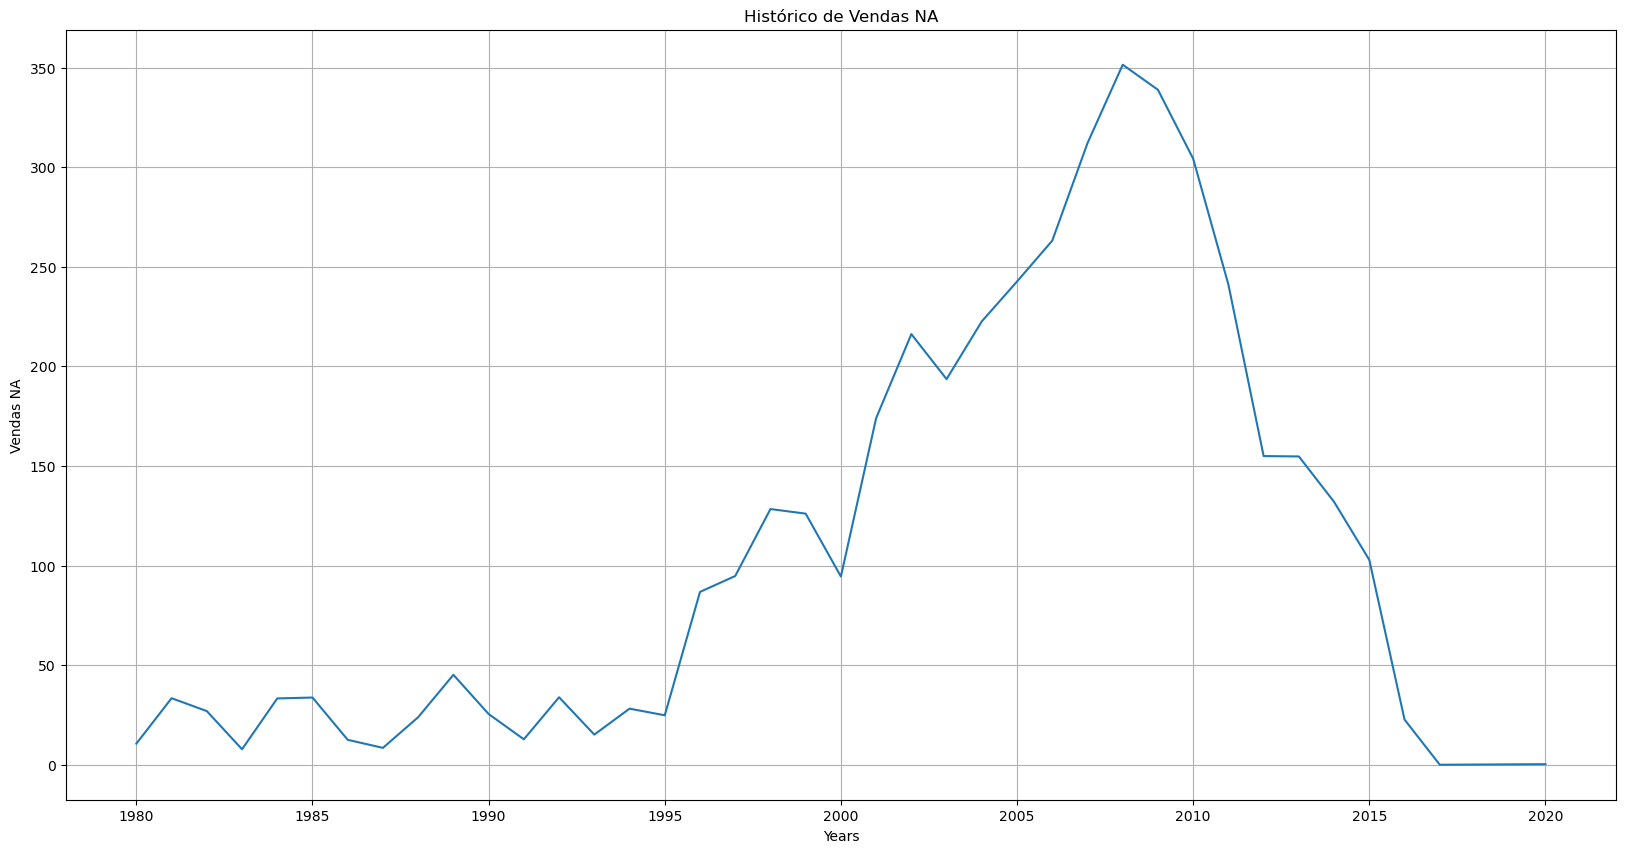

In [10]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(hist_vendas['Year'], hist_vendas['NA_Sales'])

ax.set(xlabel='Years', ylabel='Vendas NA', title='Histórico de Vendas NA')
ax.grid()

plt.show()

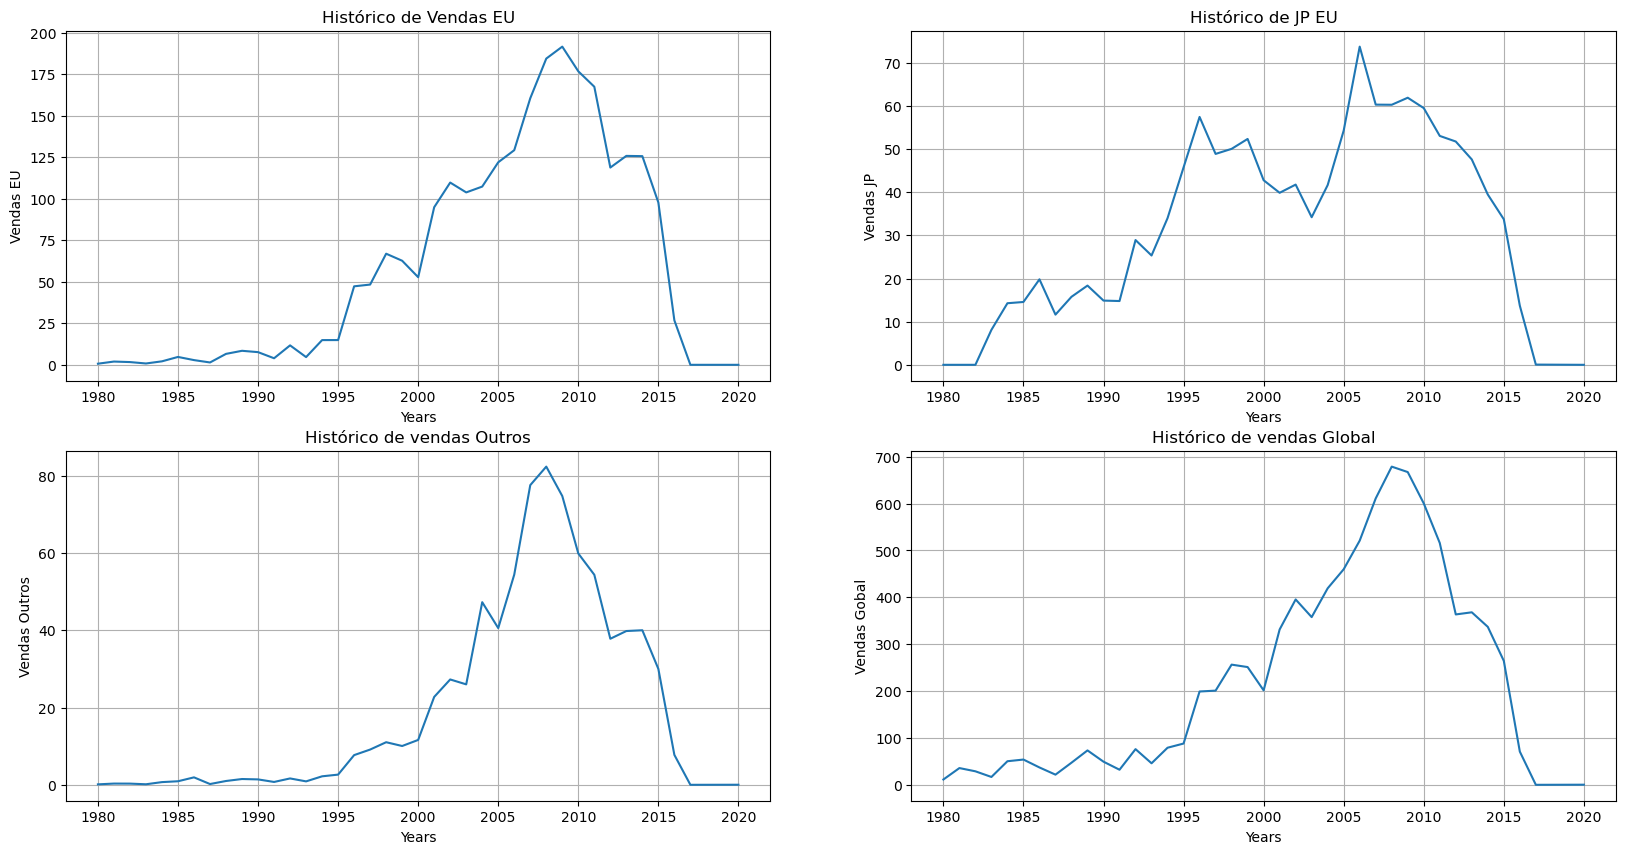

In [11]:
#2) Como é que o histórico de Vendas nos Outros Continentes?
#Desmostrando os outros gráficos juntos

fig, axs = plt.subplots(2, 2, figsize=(20, 10))
axs[0, 0].plot(hist_vendas["Year"], hist_vendas['EU_Sales'])
axs[0, 1].plot(hist_vendas["Year"], hist_vendas['JP_Sales'])
axs[1, 1].plot(hist_vendas["Year"], hist_vendas['Global_Sales'])
axs[1, 0].plot(hist_vendas["Year"], hist_vendas['Other_Sales'])


axs[0, 0].set(xlabel='Years', ylabel='Vendas EU', title='Histórico de Vendas EU')

axs[0, 1].set(xlabel='Years', ylabel='Vendas JP', title='Histórico de JP EU')

axs[1, 1].set(xlabel='Years', ylabel='Vendas Gobal', title='Histórico de vendas Global')

axs[1, 0].set(xlabel='Years', ylabel='Vendas Outros', title='Histórico de vendas Outros')

axs[0, 0].grid()
axs[0, 1].grid()
axs[1, 1].grid()
axs[1, 0].grid()

plt.show()


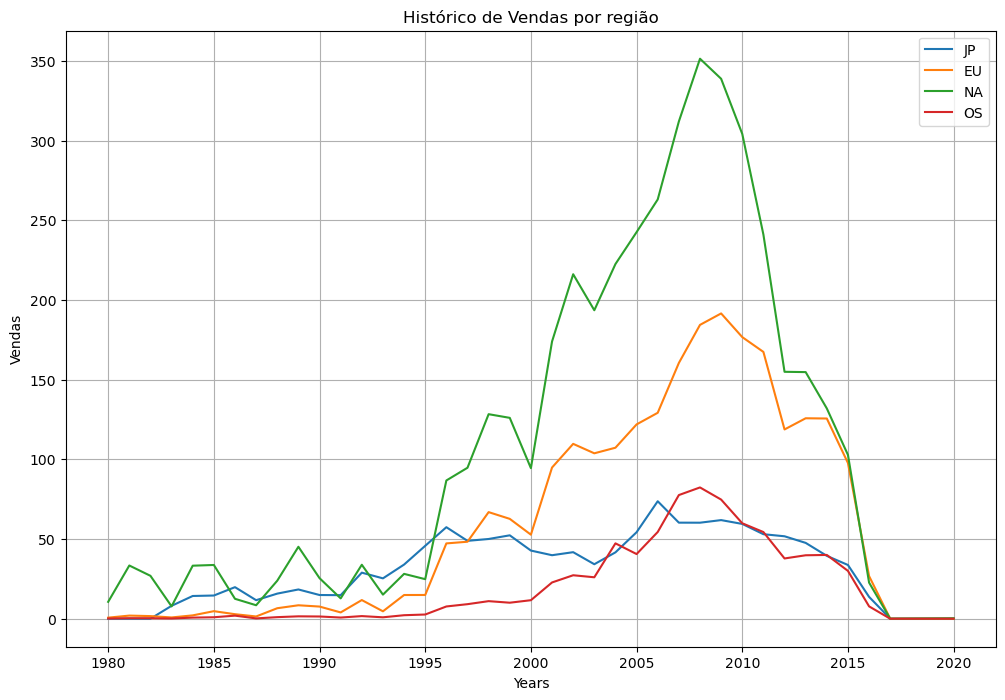

In [12]:
#Observando os dados num mesmo Gráfico:

fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(hist_vendas["Year"], hist_vendas['JP_Sales'],label="JP")
ax.plot(hist_vendas["Year"], hist_vendas['EU_Sales'],label="EU")
ax.plot(hist_vendas["Year"], hist_vendas['NA_Sales'],label="NA")
ax.plot(hist_vendas["Year"], hist_vendas['Other_Sales'],label="OS")
ax.set(xlabel="Years", ylabel='Vendas', title = 'Histórico de Vendas por região')

ax.grid()
ax.legend()
plt.show()

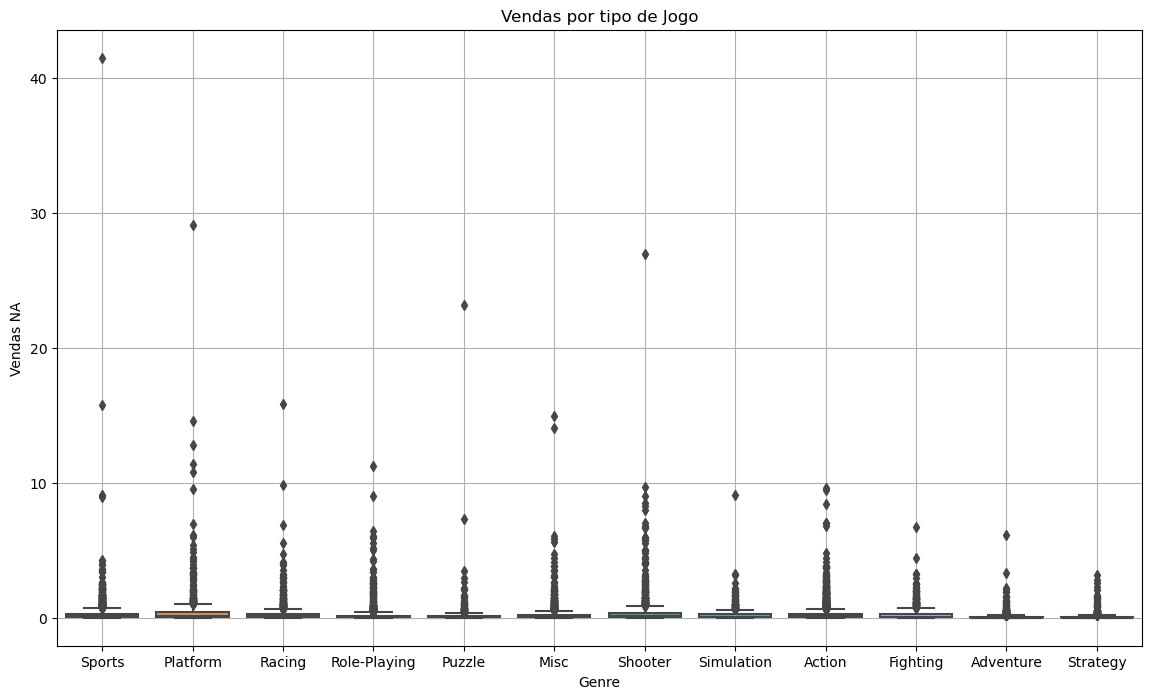

In [13]:
#3) - Existem vários tipos de Jogos nesses dados, eles estão todos iguais em relação as vendas América do Norte? E outros mais?

fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(data = dados, x=dados['Genre'], y = dados['NA_Sales'])
ax.set(ylabel='Vendas NA', title='Vendas por tipo de Jogo')

ax.grid()
plt.show()

In [14]:
dados['NA_Sales'][dados['Genre'] == 'Sports'].describe()

count    2346.000000
mean        0.291283
std         1.041024
min         0.000000
25%         0.020000
50%         0.110000
75%         0.300000
max        41.490000
Name: NA_Sales, dtype: float64

In [15]:
#agrupando os jogos por genero de do Jogo


genero_agr = dados[['Genre', 'NA_Sales', 
                     'EU_Sales', 'JP_Sales', 'Other_Sales', 
                     'Global_Sales']].groupby('Genre').agg(lambda x: sum(x)).reset_index() 

genero_agr.tail(5)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7,Role-Playing,327.28,188.06,352.31,59.61,927.37
8,Shooter,582.60,313.27,38.28,102.69,1037.37
9,Simulation,183.31,113.38,63.70,31.52,392.20
10,Sports,683.35,376.85,135.37,134.97,1330.93
11,Strategy,68.70,45.34,49.46,11.36,175.12


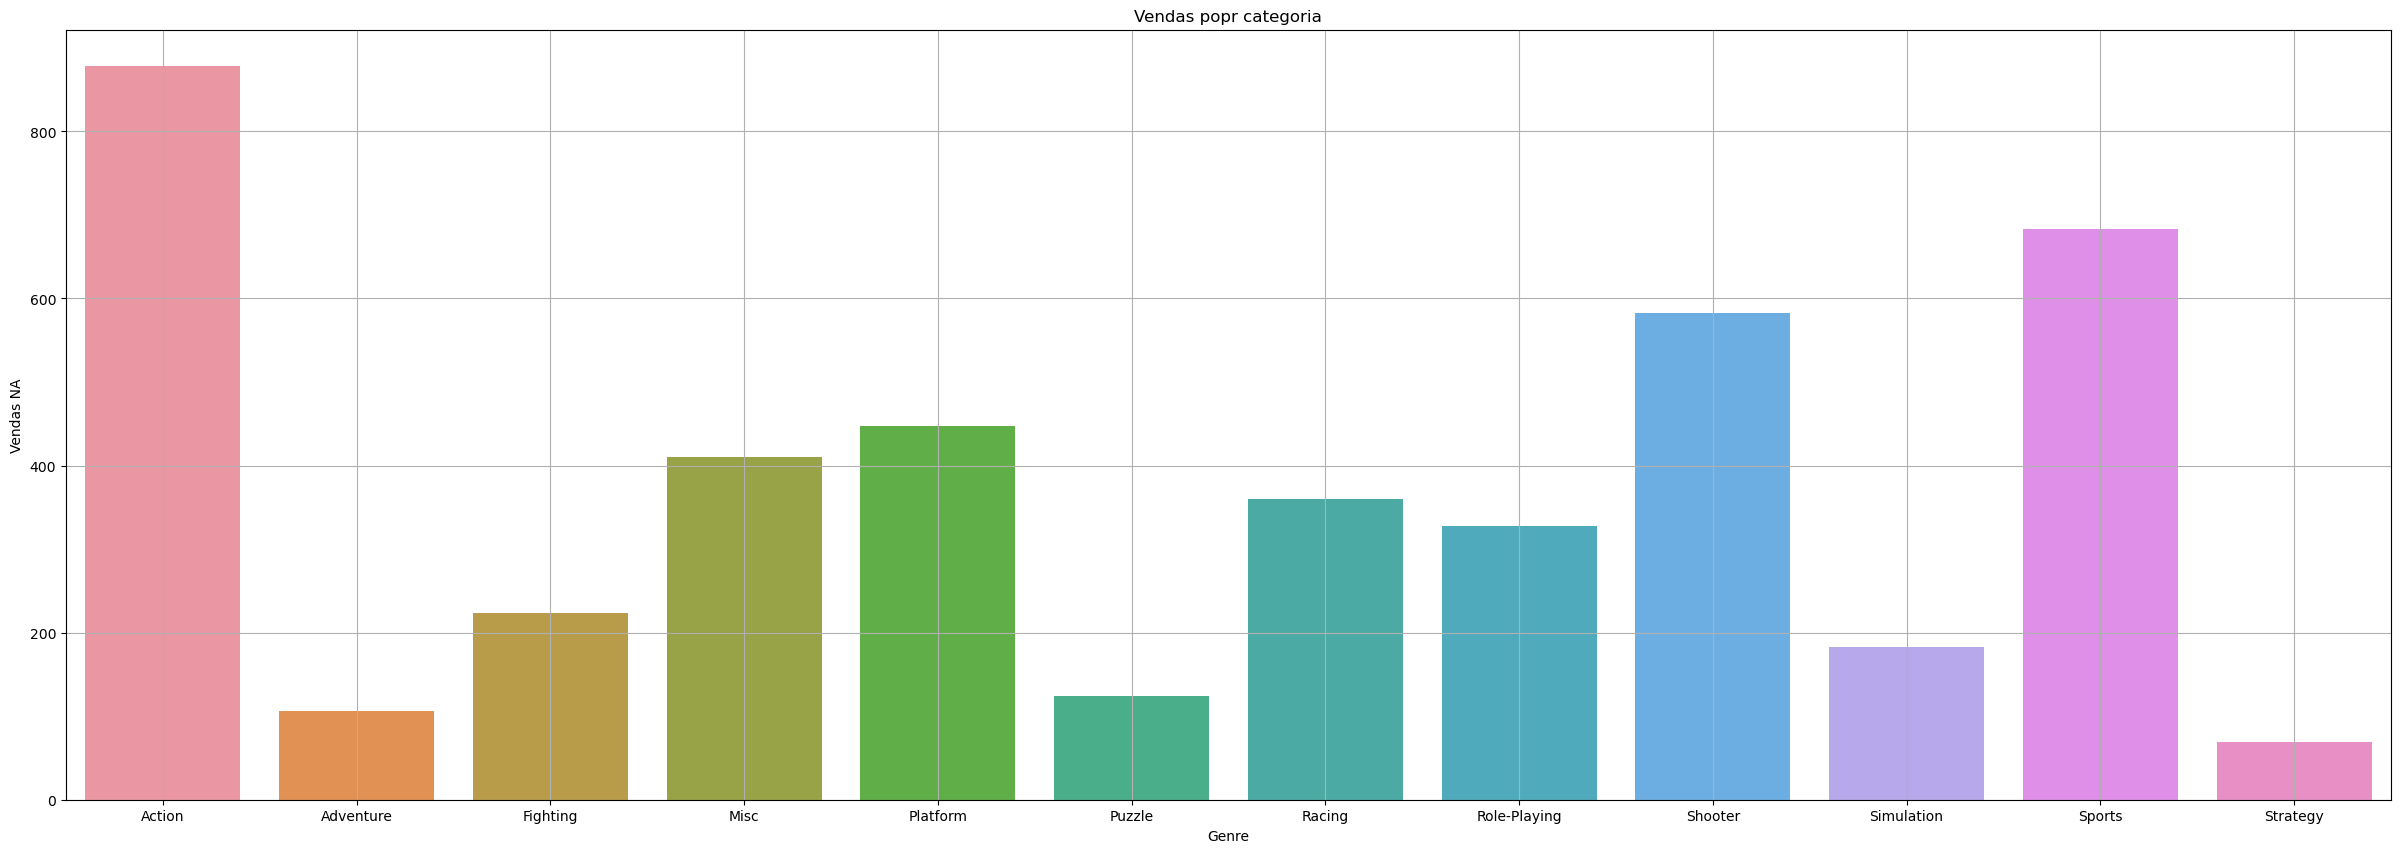

In [16]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(data= genero_agr, x=genero_agr['Genre'], y=genero_agr['NA_Sales'])

ax.set(ylabel='Vendas NA', 
       title='Vendas popr categoria')

ax.grid()
plt.show()

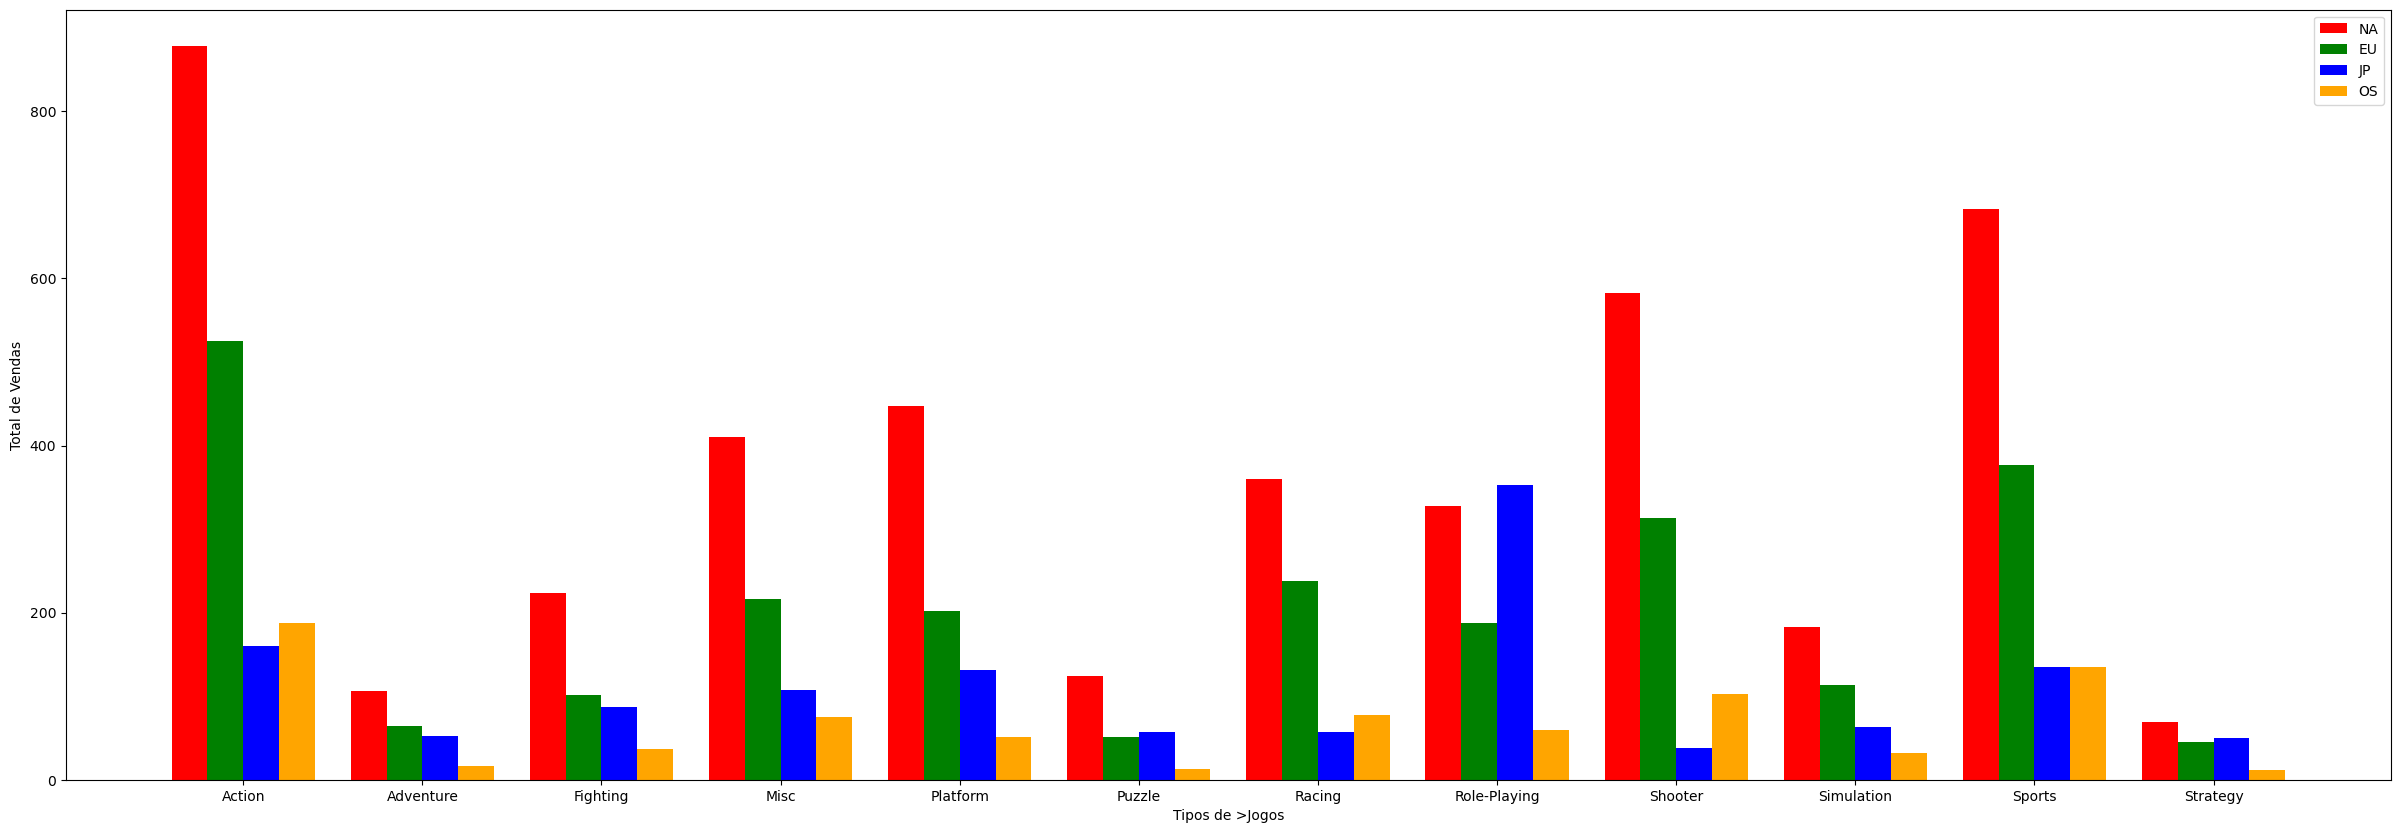

In [17]:
fig, axs = plt.subplots(figsize=(30, 10))

NA_s = genero_agr['NA_Sales']
EU_s = genero_agr['EU_Sales']
JP_s = genero_agr['JP_Sales']
OS_s = genero_agr['Other_Sales']

tst=np.arange(len(genero_agr['Genre']))
width = 0.20

NA = plt.bar(tst, height=NA_s,width = width, color='red')
EU = plt.bar(tst+width, height=EU_s,width = width, color='green')
JP = plt.bar(tst+width*2, height=JP_s,width = width, color='blue')
OS = plt.bar(tst+width*3, height=OS_s,width = width, color='orange')


plt.xlabel("Tipos de >Jogos")
plt.ylabel("Total de Vendas")

plt.xticks(tst+3/2*width, ["Action", "Adventure", "Fighting", "Misc", "Platform", "Puzzle", 
                           "Racing", "Role-Playing", "Shooter", "Simulation", "Sports", "Strategy"])

plt.legend((NA,EU,JP,OS), ('NA', 'EU', 'JP', 'OS'))

plt.show()

In [18]:
#4) Existem Jogos que giram mais dinheiro que outros? Quais são?

valor_num = dados[['Name', 'NA_Sales', 
                     'EU_Sales', 'JP_Sales', 'Other_Sales', 
                     'Global_Sales']].groupby('Name').agg(lambda x: sum(x)).reset_index()


valor_num.sort_values("Global_Sales", ascending=False).head(10)

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11007,Wii Sports,41.49,29.02,3.77,8.46,82.74
3712,Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
9327,Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
9715,Tetris,26.17,2.95,6.03,0.69,35.84
5573,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
11009,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
7346,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37
1222,Call of Duty: Black Ops,17.59,9.50,0.59,3.36,31.03
1228,Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83
6723,New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01


<Axes: xlabel='Name', ylabel='Global_Sales'>

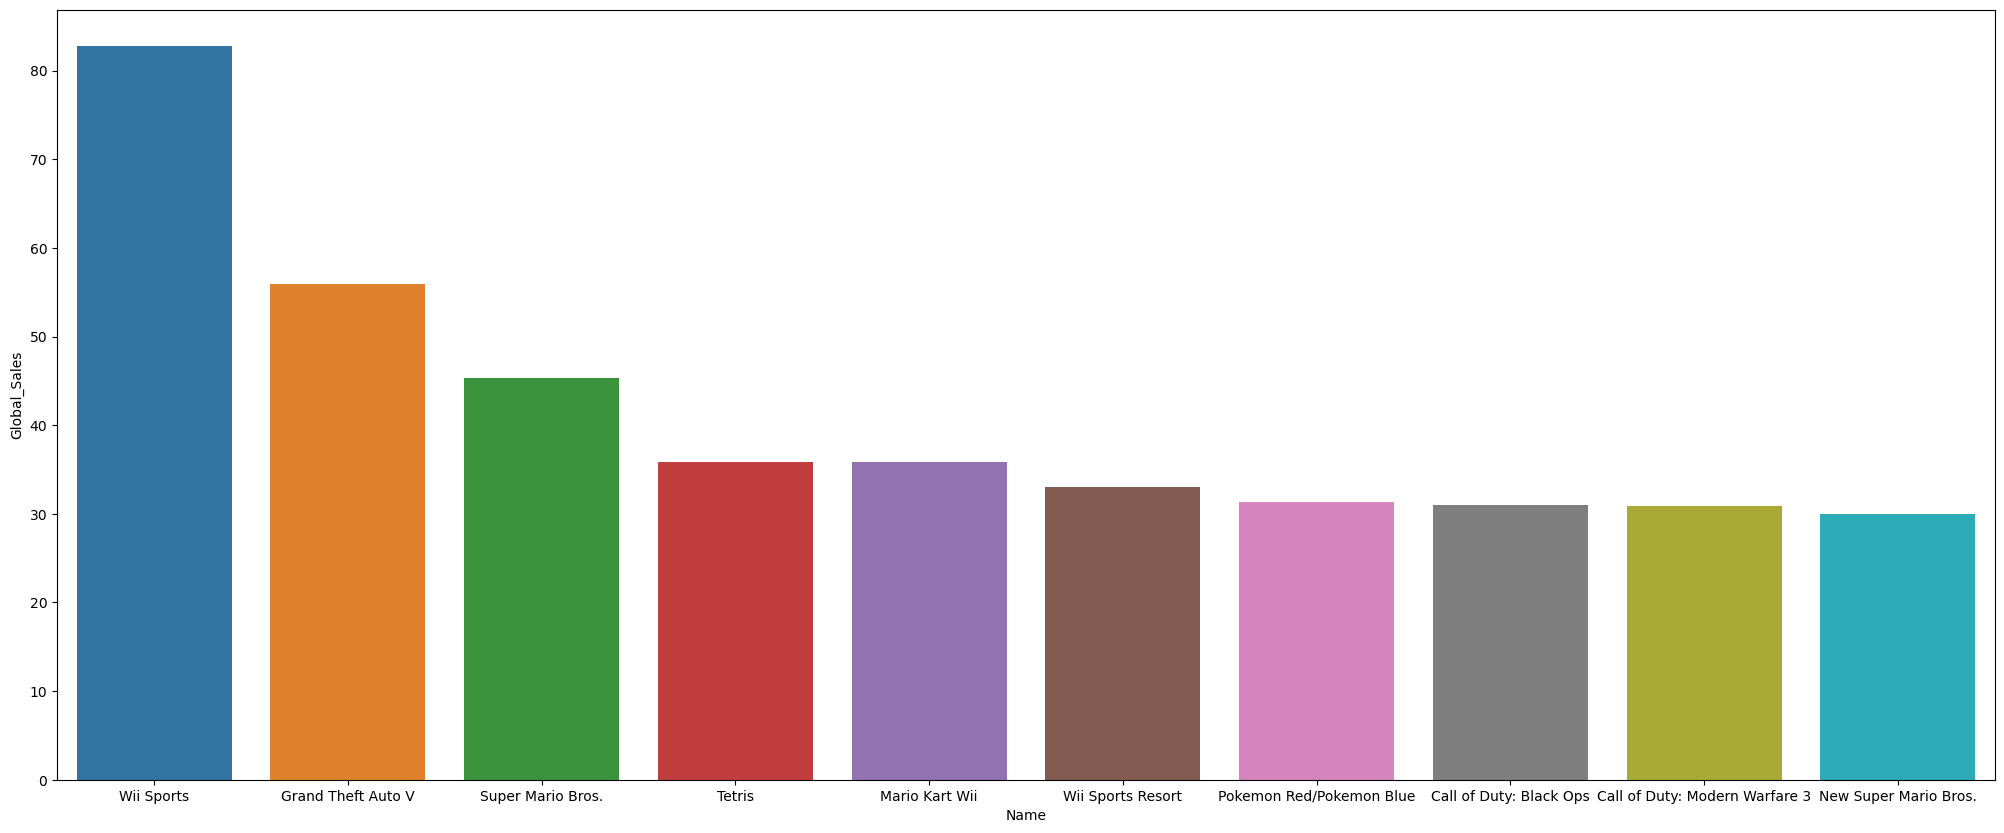

In [19]:
#mostrando o top 10 das vendas

top_10 = valor_num.sort_values("Global_Sales", ascending=False).head(10)
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=top_10, x=top_10['Name'], y=top_10["Global_Sales"])

5) - Nessa base vimos que demais continentes estão agrupados ("resto do munndo"), é um valor muito 
diferente dos outrso paises na tabela ou isso que dizer que outros continentes ainda estão gastando pouco com isso?

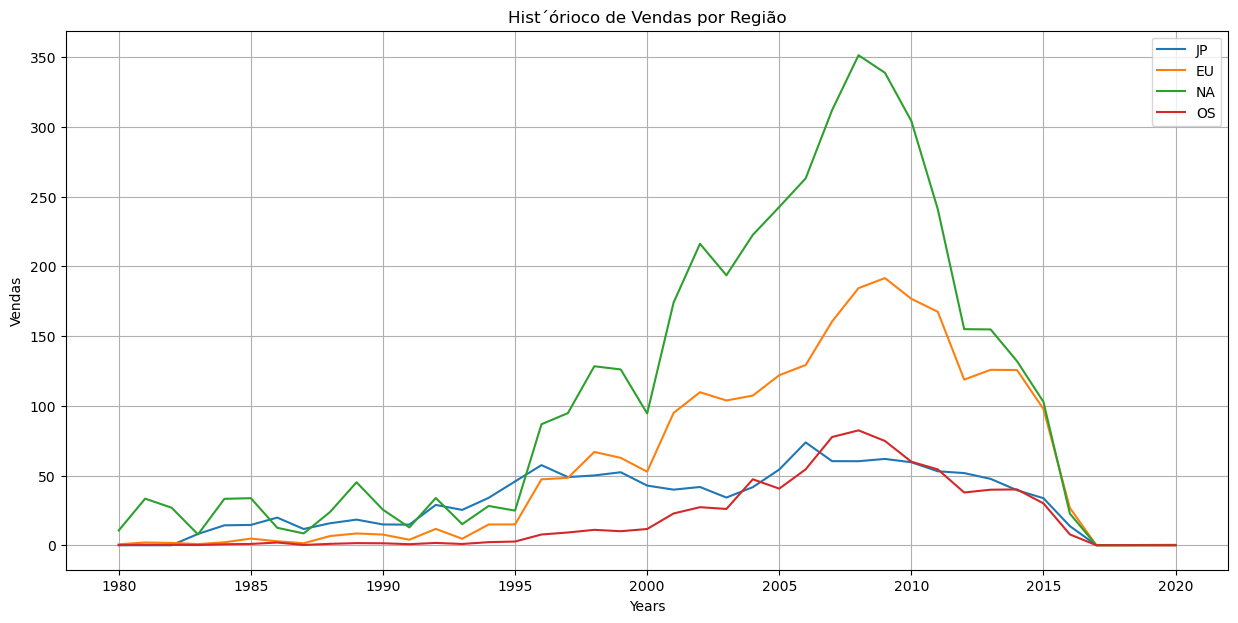

In [20]:

fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(hist_vendas["Year"], hist_vendas['JP_Sales'], label="JP")
ax.plot(hist_vendas["Year"], hist_vendas['EU_Sales'], label="EU")
ax.plot(hist_vendas["Year"], hist_vendas['NA_Sales'], label="NA")
ax.plot(hist_vendas["Year"], hist_vendas['Other_Sales'], label="OS")
ax.set(xlabel='Years', ylabel='Vendas', 
       title="Hist´órioco de Vendas por Região")
ax.grid()
ax.legend()
plt.show()

#6) Nesses Outros continentes continentes vemos algum padrão? Tipo uma tendencia de crescimento?(O que seria Optimo)

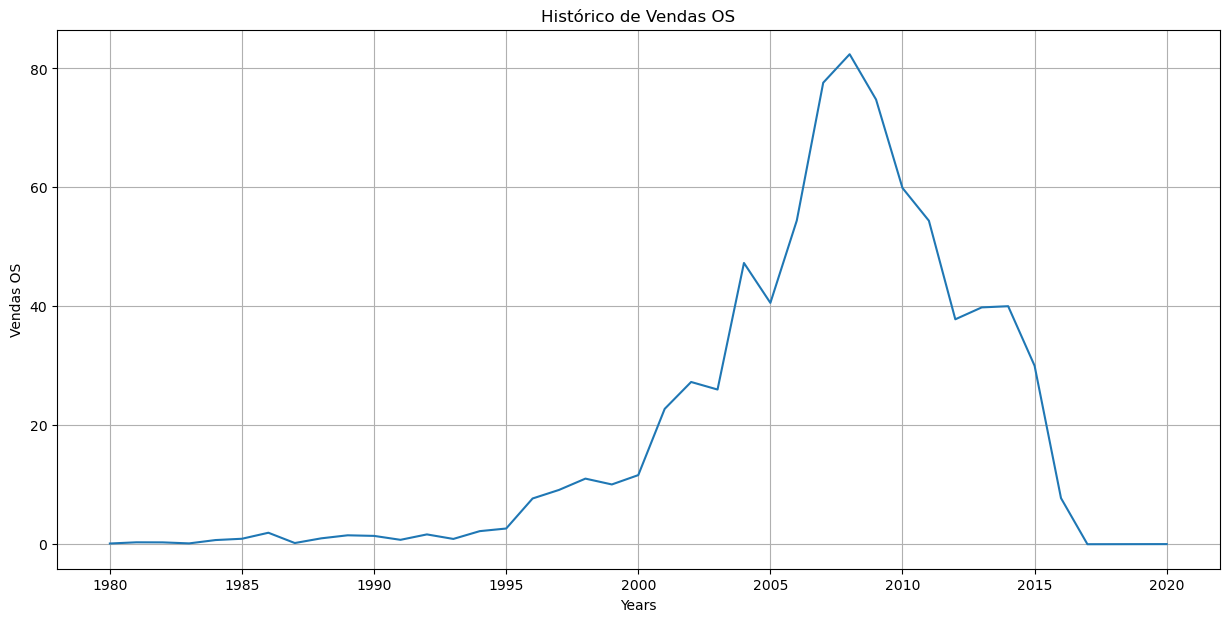

In [21]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(hist_vendas['Year'], hist_vendas['Other_Sales'])

ax.set(xlabel='Years', ylabel='Vendas OS', 
       title="Histórico de Vendas OS")

ax.grid()

plt.show()

#7) Quais Jogos são os mais Vendidos?

In [22]:
#mais_vend = dados[['Name','Genre', 'NA_Sales', 
                     #'EU_Sales', 'JP_Sales', 'Other_Sales', 
                     #'Global_Sales']].groupby("Name").agg(lambda x: sum(x)).reset_index() 

#mais_vend.sort_values("Other_Sales", ascending=False).head(10)

In [23]:

mais_vend = dados[['Name','NA_Sales', 
                     'EU_Sales', 'JP_Sales', 'Other_Sales', 
                     'Global_Sales']].groupby("Name").agg(lambda x: sum(x)).reset_index() 

mais_vend.sort_values("Global_Sales", ascending=False).head(10)

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11007,Wii Sports,41.49,29.02,3.77,8.46,82.74
3712,Grand Theft Auto V,23.46,23.04,1.39,8.03,55.92
9327,Super Mario Bros.,32.48,4.88,6.96,0.99,45.31
9715,Tetris,26.17,2.95,6.03,0.69,35.84
5573,Mario Kart Wii,15.85,12.88,3.79,3.31,35.82
11009,Wii Sports Resort,15.75,11.01,3.28,2.96,33.00
7346,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,31.37
1222,Call of Duty: Black Ops,17.59,9.50,0.59,3.36,31.03
1228,Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35,30.83
6723,New Super Mario Bros.,11.38,9.23,6.50,2.90,30.01


8) - O Mais Vendido esta crescendo ou esta em queda? - è Necessário do Histórico desta questão

In [24]:
mvtop = dados.sort_values('Global_Sales', ascending=False).head(1)
mvtop

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


9) - Qual foi o campeão de vendas?

In [25]:
top_vendas = dados[['Year','Global_Sales']].groupby("Year").agg(lambda x: sum(x)).reset_index() 
top_vendas.sort_values('Global_Sales', ascending=False)

,Year,Global_Sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04
31,2011.0,515.99
25,2005.0,459.94
24,2004.0,419.31
22,2002.0,395.52
33,2013.0,368.11


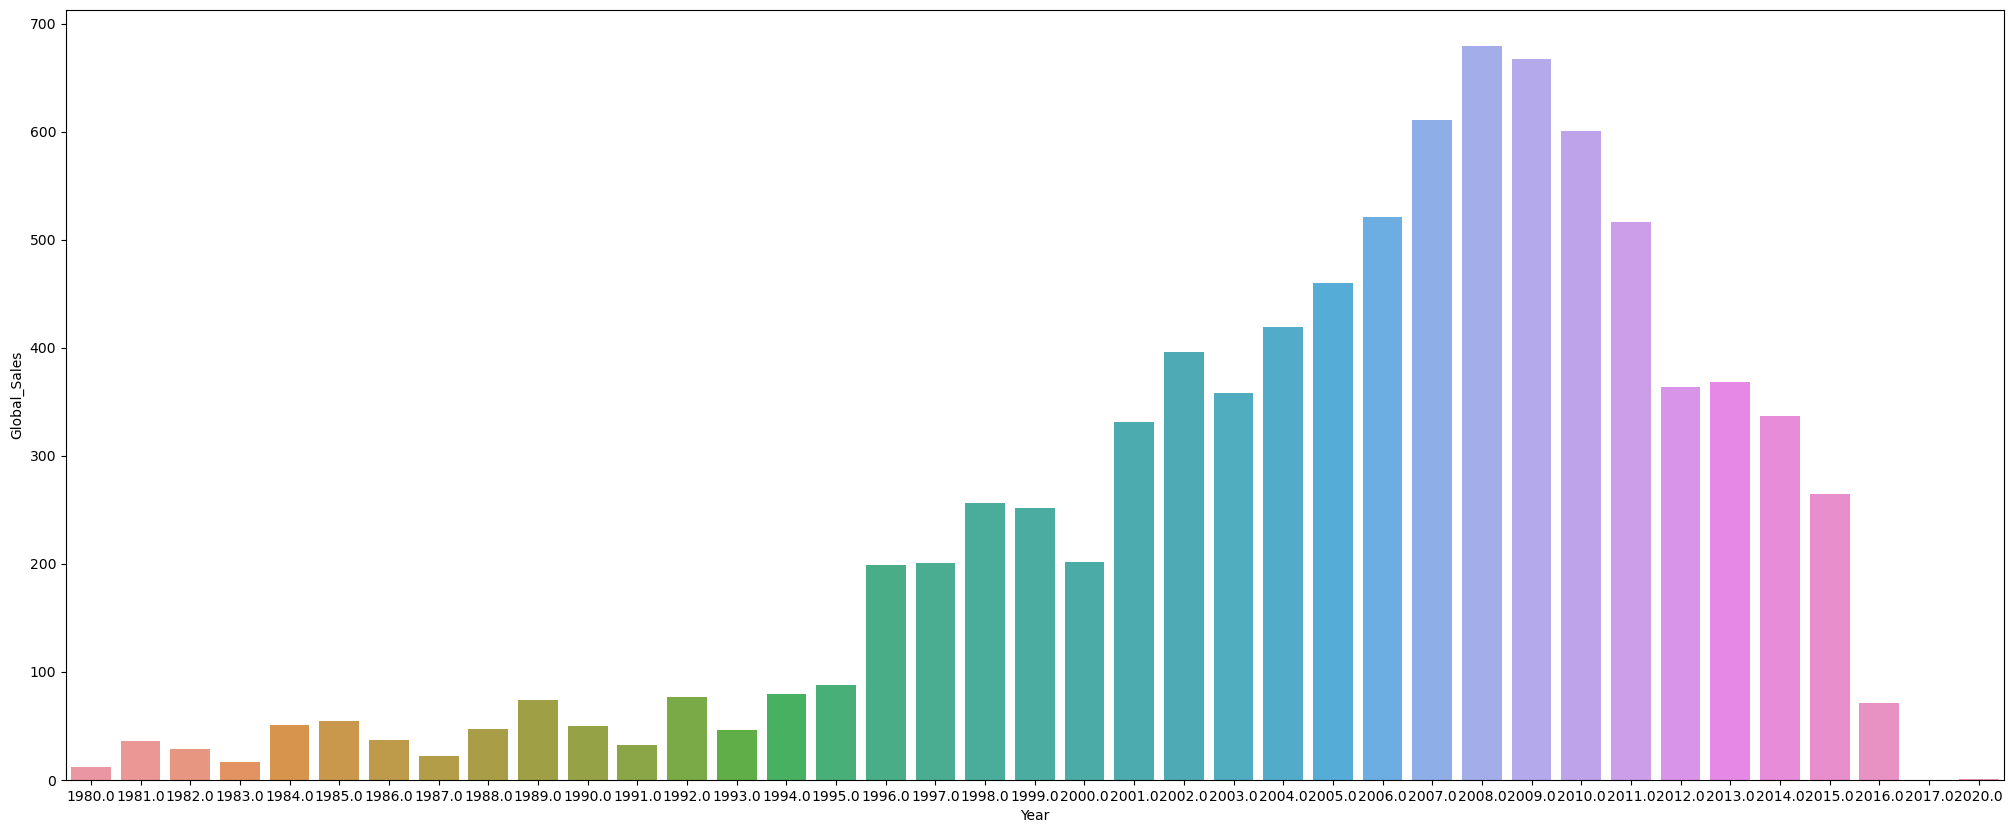

In [26]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=top_vendas, x=top_vendas['Year'], y=top_vendas['Global_Sales'])
plt.show()

#10) - Qual Editora teve mais vendas no ultimo ano? Qual foi o movimento da existência dela? Crescimento ou queda? (lança)

In [27]:
ano_publicado = dados[(dados['Year'] == 2020.0)]
venda_editora = ano_publicado[['Publisher','NA_Sales', 
                     'EU_Sales', 'JP_Sales', 'Other_Sales', 
                     'Global_Sales']].groupby("Publisher").agg(lambda x: sum(x)).reset_index()
venda_editora.head(5)

,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Ubisoft,0.27,0.0,0.0,0.02,0.29


In [28]:
#Pelo facto de exitir um só jogo, vamos verificar o ano de 2008

ano_publicado = dados[(dados['Year'] == 2008.0)]
venda_editora = ano_publicado[['Publisher','NA_Sales', 
                     'EU_Sales', 'JP_Sales', 'Other_Sales', 
                     'Global_Sales']].groupby("Publisher").agg(lambda x: sum(x)).reset_index()
venda_editora.sort_values("Global_Sales", ascending=False).head(10)



,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
108,Nintendo,38.83,25.13,19.96,7.22,91.22
52,Electronic Arts,45.10,25.59,0.78,12.65,84.12
6,Activision,40.83,16.19,0.05,10.32,67.41
151,Ubisoft,31.88,18.96,0.68,5.90,57.44
142,Take-Two Interactive,26.46,13.78,0.71,5.28,46.18
131,Sega,16.49,12.90,3.44,4.39,37.19
140,THQ,18.44,7.83,0.06,4.07,30.45
83,Konami Digital Entertainment,9.48,7.75,5.91,4.63,27.82
132,Sony Computer Entertainment,11.02,8.50,1.24,5.87,26.64
48,Disney Interactive Studios,12.32,6.92,0.02,2.78,22.09


In [29]:
#10.1) - Qual o foi o movimento do Nitendo ao longo dos anos 

nitendo = dados[(dados['Publisher'] == 'Nintendo')]

agrp_nintendo = nitendo[['Year','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales']].groupby("Year").agg(lambda x: sum(x)).reset_index()
agrp_nintendo.head(40)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1983.0,2.32,0.46,8.10,0.08,10.96
1,1984.0,32.57,1.95,10.36,0.67,45.56
2,1985.0,32.48,4.54,12.02,0.91,49.95
3,1986.0,6.73,1.73,7.45,0.26,16.18
4,1987.0,5.13,1.18,5.46,0.18,11.95
5,1988.0,21.23,6.15,8.13,0.93,36.44
6,1989.0,39.81,7.60,15.06,1.40,63.88
7,1990.0,19.75,6.42,8.08,1.22,35.49
8,1991.0,6.95,2.47,6.22,0.33,15.97
9,1992.0,18.48,6.08,12.66,0.91,38.11


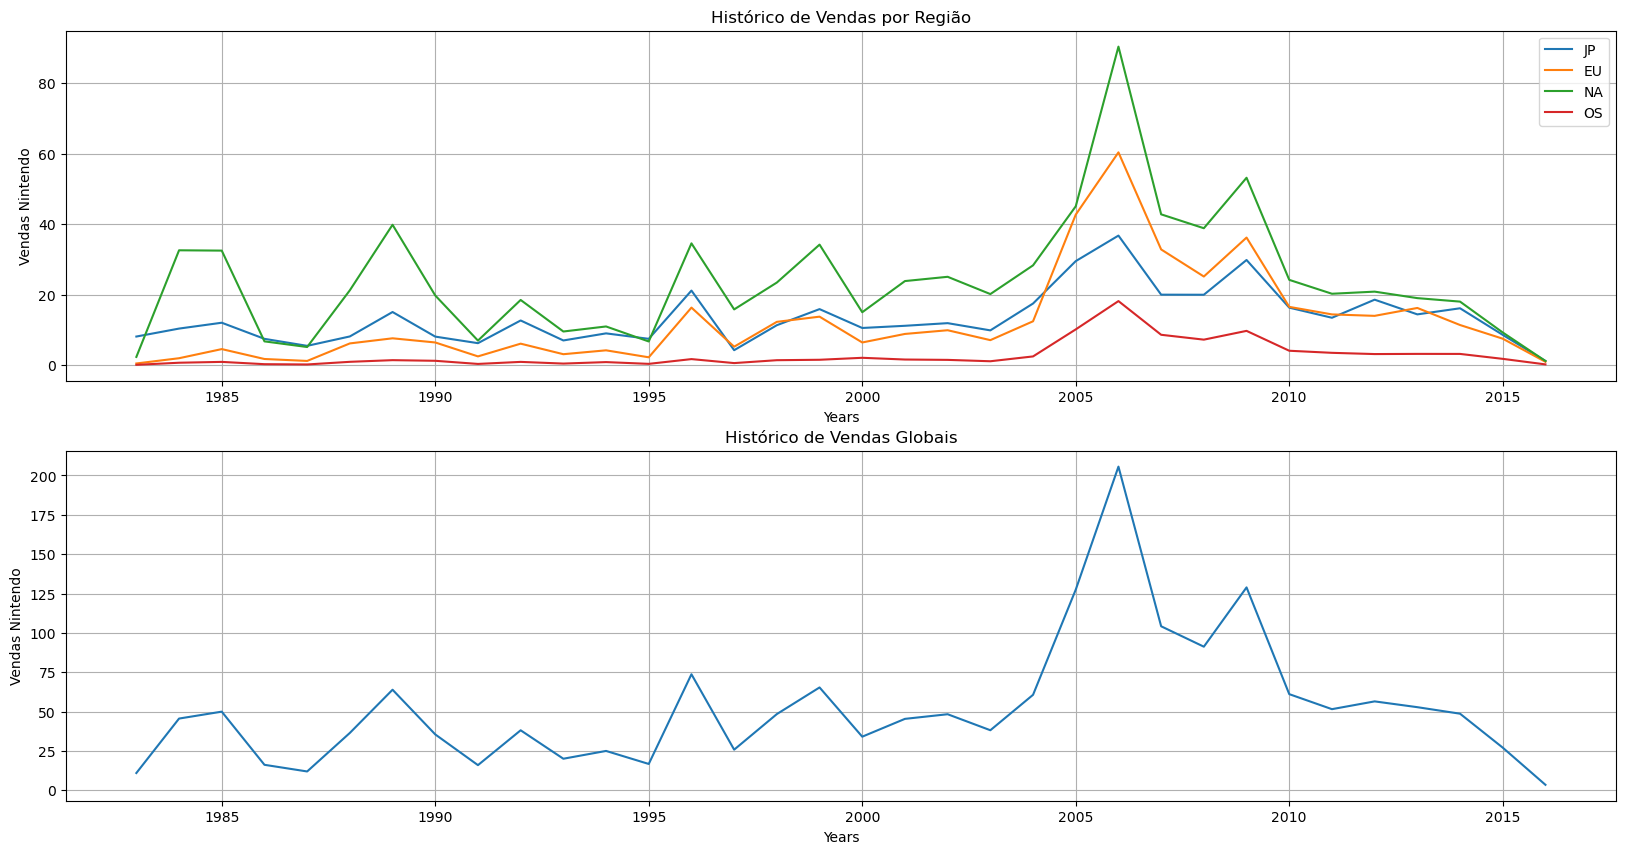

In [30]:
#Projectar o grafico

fig, axs = plt.subplots(2,1,figsize=(20,10))
axs[0].plot(agrp_nintendo["Year"], agrp_nintendo["JP_Sales"], label="JP")
axs[0].plot(agrp_nintendo["Year"], agrp_nintendo["EU_Sales"], label="EU")
axs[0].plot(agrp_nintendo["Year"], agrp_nintendo["NA_Sales"], label="NA")
axs[0].plot(agrp_nintendo["Year"], agrp_nintendo["Other_Sales"], label="OS")
axs[1].plot(agrp_nintendo["Year"], agrp_nintendo["Global_Sales"])

axs[0].set(xlabel="Years", ylabel="Vendas Nintendo", title="Histórico de Vendas por Região")
axs[1].set(xlabel='Years', ylabel="Vendas Nintendo", title="Histórico de Vendas Globais")

axs[0].grid()
axs[1].grid()
axs[0].legend()
plt.show()

In [31]:
#11) Qual ano Nintendo vendeu mais jogos?
#Quais jogos foram vendidos nesse respectivo ano?

agrp_nintendo.sort_values("Global_Sales", ascending=False).head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
23,2006.0,90.35,60.35,36.74,18.16,205.61
26,2009.0,53.15,36.18,29.82,9.71,128.89
22,2005.0,45.05,42.69,29.50,10.13,127.47
24,2007.0,42.77,32.81,19.98,8.60,104.18
25,2008.0,38.83,25.13,19.96,7.22,91.22


In [32]:
# - Quais foram os jogos mais vendidos pela Nintendo em 2006

dados[(dados['Publisher'] == 'Nintendo') & (dados['Year'] == 2006.0)]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
20,21,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.36
100,101,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3.83,2.19,0.60,0.70,7.31
376,377,Clubhouse Games,DS,2006.0,Misc,Nintendo,0.59,1.83,0.73,0.35,3.50
402,403,English Training: Have Fun Improving Your Skills!,DS,2006.0,Misc,Nintendo,0.00,0.99,2.32,0.02,3.33
444,445,Personal Trainer: Cooking,DS,2006.0,Misc,Nintendo,0.91,1.00,1.03,0.17,3.12
490,491,WarioWare: Smooth Moves,Wii,2006.0,Puzzle,Nintendo,0.87,1.06,0.73,0.26,2.92
526,527,Yoshi's Island DS,DS,2006.0,Platform,Nintendo,1.47,0.07,1.10,0.15,2.80


In [33]:
#12) Qual Plataforma teve mais vendas? Qual foi o movimento desde a existência dela?
#Agrupando pela plataforma de Jogo

agru_pltaforma = dados[['Platform','NA_Sales', 'EU_Sales', 
                        'JP_Sales','Other_Sales','Global_Sales']].groupby("Platform").agg(lambda x: sum(x)).reset_index()

agru_pltaforma.sort_values("Global_Sales", ascending=False).head(10)

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16,PS2,583.84,339.29,139.20,193.44,1255.64
28,X360,601.05,280.58,12.43,85.54,979.96
17,PS3,392.26,343.71,79.99,141.93,957.84
26,Wii,507.71,268.38,69.35,80.61,926.71
4,DS,390.71,194.65,175.57,60.53,822.49
15,PS,336.51,213.60,139.82,40.91,730.66
6,GBA,187.54,75.25,47.33,7.73,318.50
19,PSP,108.99,68.25,76.79,42.19,296.28
18,PS4,96.80,123.70,14.30,43.36,278.10
13,PC,93.28,139.68,0.17,24.86,258.82


In [34]:
#verificando o histórico do PSP2

dados_ps2 = dados[(dados['Platform'] == "PS2")]
psp2 = dados_ps2[['Year','NA_Sales', 'EU_Sales', 
                        'JP_Sales','Other_Sales','Global_Sales']].groupby("Year").agg(lambda x: sum(x)).reset_index()
psp2.head(50)

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,2000.0,16.08,10.64,8.87,3.58,39.11
1,2001.0,79.49,52.37,17.79,16.78,166.43
2,2002.0,96.54,65.27,21.85,21.72,205.40
3,2003.0,83.54,61.20,18.88,20.69,184.29
4,2004.0,96.78,56.01,19.17,39.85,211.78
5,2005.0,85.60,40.86,15.05,19.15,160.65
6,2006.0,49.93,21.61,17.64,14.24,103.42
7,2007.0,32.05,10.43,9.82,23.69,76.00
8,2008.0,21.23,7.63,5.73,19.31,53.83
9,2009.0,9.36,4.94,1.94,10.16,26.45


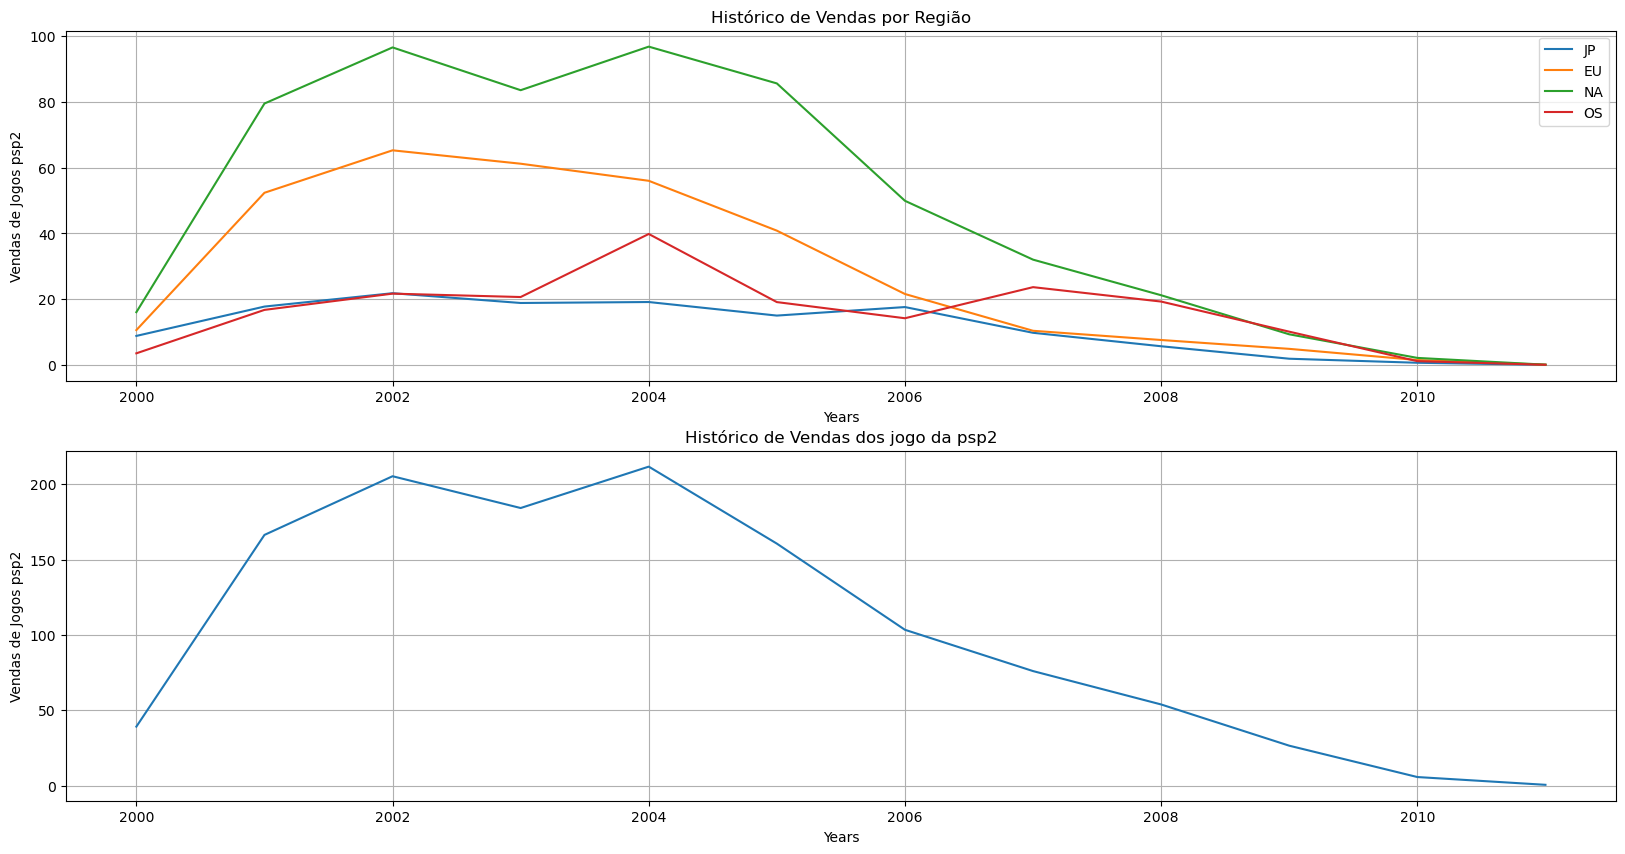

In [35]:
fig, axs = plt.subplots(2,1,figsize=(20,10))
axs[0].plot(psp2["Year"], psp2["JP_Sales"], label="JP")
axs[0].plot(psp2["Year"], psp2["EU_Sales"], label="EU")
axs[0].plot(psp2["Year"], psp2["NA_Sales"], label="NA")
axs[0].plot(psp2["Year"], psp2["Other_Sales"], label="OS")
axs[1].plot(psp2["Year"], psp2["Global_Sales"])

axs[0].set(xlabel="Years", ylabel="Vendas de Jogos psp2", title="Histórico de Vendas por Região")
axs[1].set(xlabel='Years', ylabel="Vendas de Jogos psp2", title="Histórico de Vendas dos jogo da psp2")

axs[0].grid()
axs[1].grid()
axs[0].legend()
plt.show()

In [36]:
#13 Quantos Jogos são lançados por ano

jogos_ano = dados[['Year', 'Name']].groupby("Year").agg(lambda x: x.count()).reset_index()
jogos_ano

,Year,Name
0,1980.0,9
1,1981.0,46
2,1982.0,36
3,1983.0,17
4,1984.0,14
5,1985.0,14
6,1986.0,21
7,1987.0,16
8,1988.0,15
9,1989.0,17


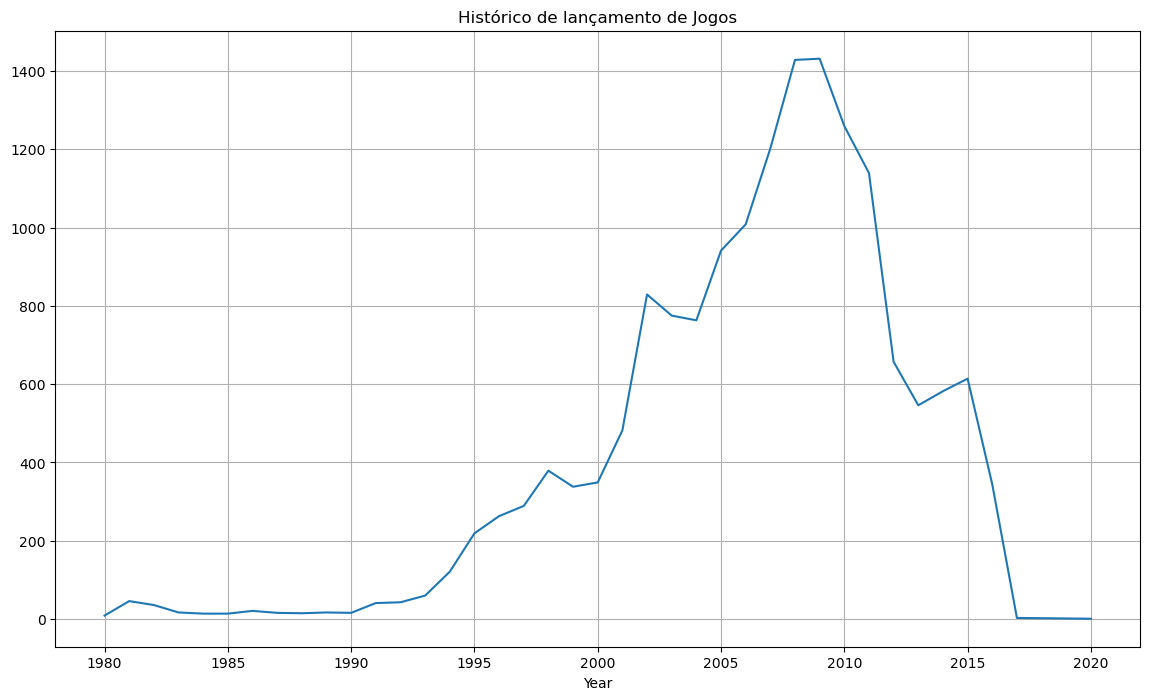

In [37]:
#14 Como é esse movivento ao longo dos anos? Estão aumentando os números de jogos lançados ao longo dos anos?

fig, ax = plt.subplots(figsize=(14, 8))
ax.plot(jogos_ano['Year'], jogos_ano['Name'])

ax.set(xlabel='Year', label='Número de Jogos Lançados',
       title= 'Histórico de lançamento de Jogos')

ax.grid()

plt.show()

#Notamos que o movimento esta em queda

In [38]:
#15) Quais são as plataformas mais utilizadas desde 2012? 


plata_recente = dados[(dados['Year'] > 2011.0)]
recente = plata_recente[['Platform','NA_Sales', 'EU_Sales', 
                        'JP_Sales','Other_Sales','Global_Sales']].groupby("Platform").agg(lambda x: sum(x)).reset_index()
recente.sort_values("Global_Sales", ascending=False).head(10)

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
3,PS3,102.39,114.01,35.09,47.07,298.65
4,PS4,96.80,123.70,14.30,43.36,278.10
9,X360,139.01,79.98,1.57,20.10,240.79
0,3DS,51.05,39.88,84.50,8.17,183.75
10,XOne,83.19,45.65,0.34,11.92,141.06
8,WiiU,38.32,24.23,12.79,6.45,81.86
2,PC,18.23,35.19,0.00,6.84,60.42
6,PSV,14.35,14.38,20.09,7.62,56.48
7,Wii,18.76,13.12,3.39,2.88,38.12
1,DS,5.22,4.11,3.72,0.82,13.91


<Axes: xlabel='Platform', ylabel='Global_Sales'>

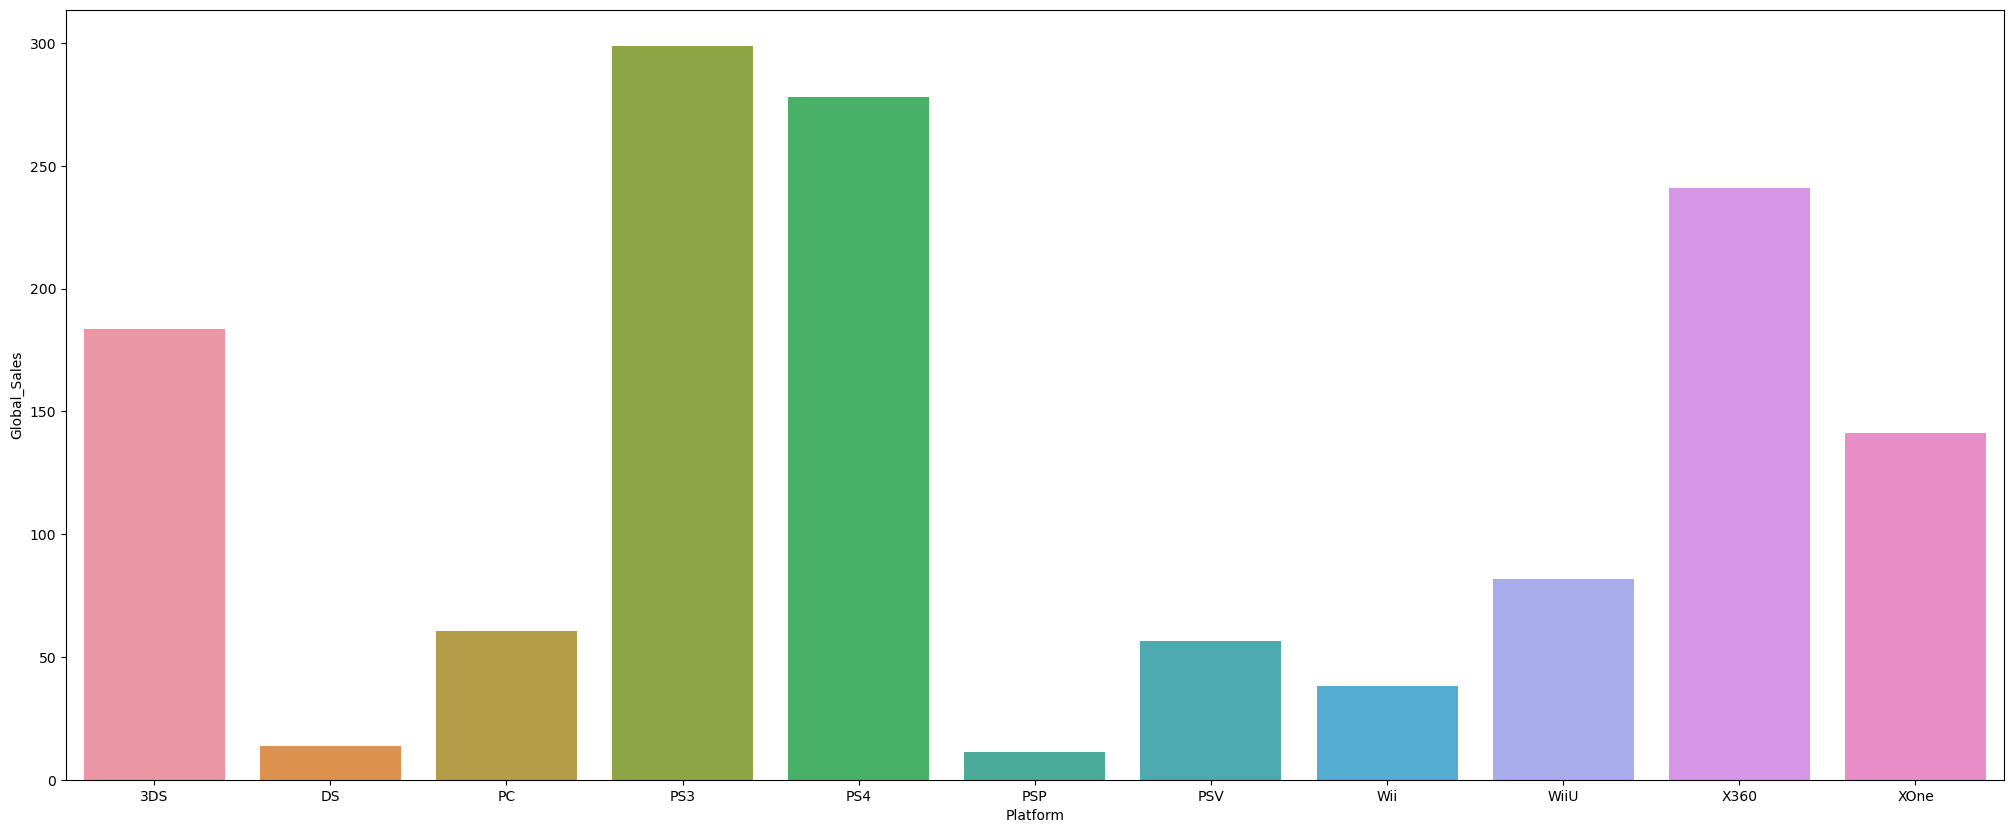

In [39]:
 #15.1 - Plotando vendas por plataformas

fig, ax = plt.subplots(figsize=(25, 10))
sns.barplot(data=recente, x=recente['Platform'], y=recente['Global_Sales'])

In [40]:
#16 Ao longo dos anos quantas plataformas novas são lançadas? É algo que vem crescendo?

novas_plataformas = dados[['Platform', 'Year']].groupby('Platform').agg(lambda x: min(x)).reset_index()
nova_plt = novas_plataformas[['Year','Platform']].groupby('Year').agg(lambda x: x.count()).reset_index()
nova_plt

,Year,Platform
0,1980.0,1
1,1983.0,1
2,1985.0,2
3,1988.0,1
4,1990.0,2
5,1992.0,1
6,1993.0,2
7,1994.0,3
8,1995.0,1
9,1996.0,2


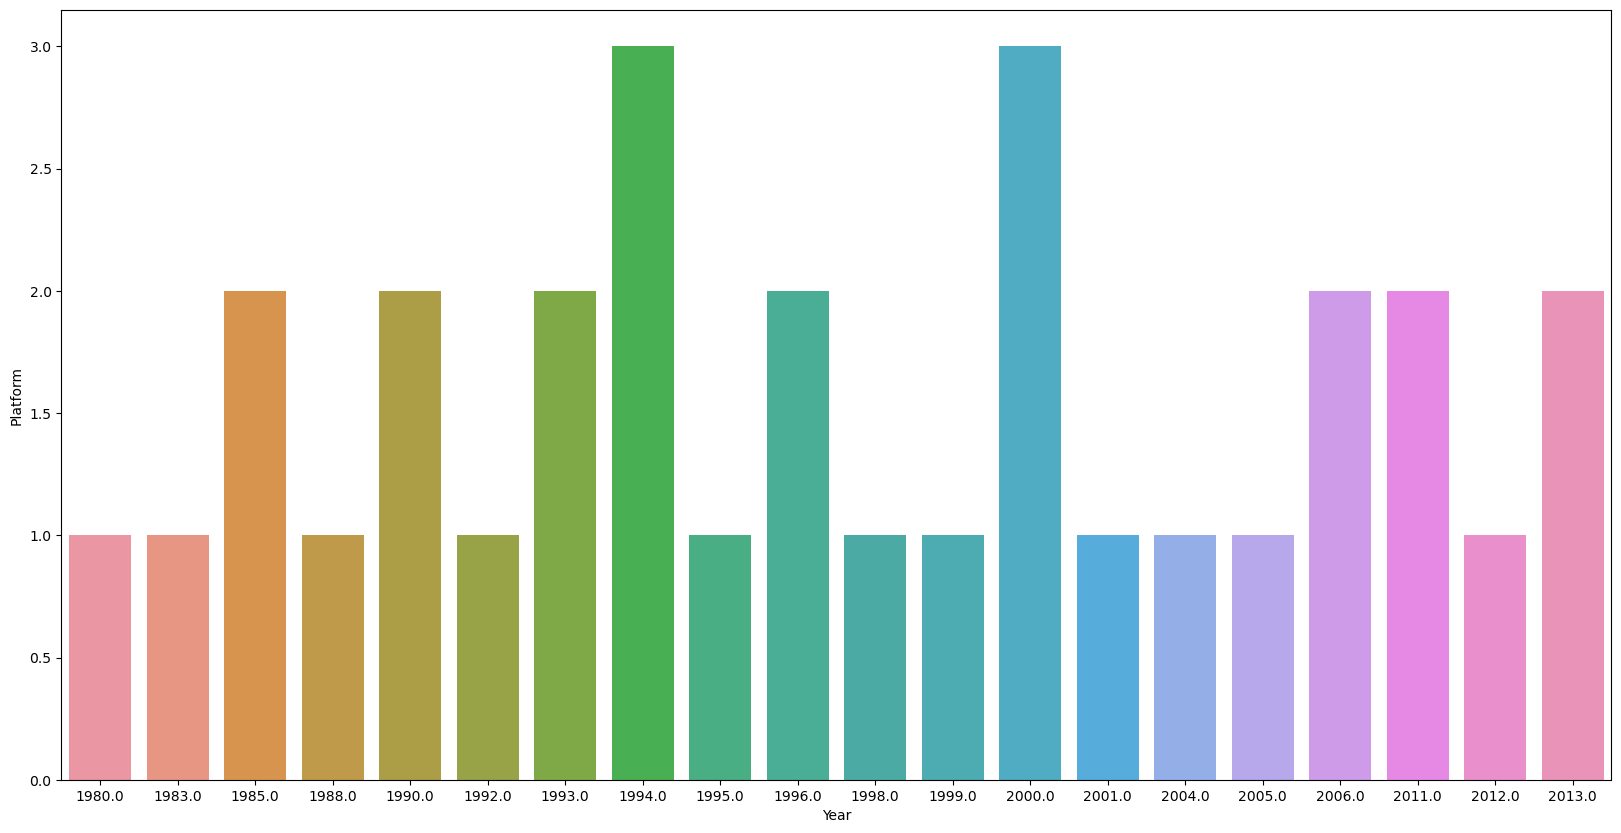

In [41]:
#16.1 Numero de plataformas lançadas por ano

fig, axs = plt.subplots(figsize=(20,10))
sns.barplot(data=nova_plt, x=nova_plt['Year'], y=nova_plt['Platform'])
plt.show()